Goals:
- What makes a globular cluster accreted?
- What do globular clusters tell us about the formation of the Milky Way?
- How do we know if they are formed within the Milky Way?
- What other possible formation scenarios could their be and how do we identify them?

Current Goal:
- Defining which globular clusters from our data sets are accreted

Notes:
- Have access to Fe/H value and estimated age of some galaxy candidates
- We can hopefully plot these values against each other and use "In-situ vs. accretted Milky Way..." paper to compare results with and determine which ones are accretted

In [2]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import astropy.io as ap

In [3]:
Harris_i = pd.read_csv('Data_Folder/HarrisPartI.csv')
#print(Harris_i)

Harris_ii = pd.read_csv('Data_Folder/HarrisPartII.csv')
#print(Harris_ii)

Harris_iii = pd.read_csv('Data_FOlder/HarrisPartIII.csv')
#print(Harris_iii)

Krause21 = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age', 'FeH', 'Object']) #usecols specifies specific columns
#print(Krause21)

VandenBerg = pd.read_csv('Data_Folder/vandenBerg_table2.csv')#, usecols=['Age', 'FeH']) #usecols specifies specific columns
#print(VandenBerg)


In [4]:
#setting x and y data from Krause for FeH/Age plots
Krause21x = pd.read_csv('Data_folder/Krause21.csv', usecols=['FeH'])
Krause21y = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age'])

#setting x and y data from vandenBerg for FeH/Age plots
VandenBergx = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['FeH'])
VandenBergy = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['Age'])


#Creating line
b = 12.7  #peak of curve
m = -1.8  #tightness of curve
x = np.linspace(-2.5, -0.5, num=100)  #limits of curve
y = m*(x+2)**2+b  #the curve (+2 shifts curve left)

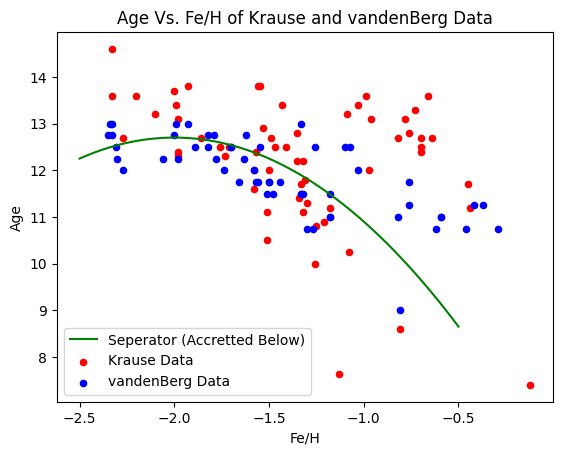

In [5]:
#Gives singular plots
#vandenBerg.plot.scatter(x="FeH", y="Age")
#Krause.plot.scatter(x="FeH", y="Age")


#Adding the line to plot
Accretted_Line = plt.plot(x, y, color='green', label='Seperator (Accretted Below)')

#Plotting data (Age/FeH) for comparison with (Belokurov, Kravtsov, 2024) - ["In-situ vs. Accretted..." (Figure 3)]
plt.scatter(Krause21x, Krause21y, color='red', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy, color='blue', label='vandenBerg Data', s=20)

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age')
plt.title('Age Vs. Fe/H of Krause and vandenBerg Data')

plt.show()

In [11]:
#Changing columns names to be able to compare in mask
Krause21x_reset = Krause21x.rename(columns={'FeH': 'Accretted'})
Krause21y_reset = Krause21y.rename(columns={'Age': 'Accretted'})
VandenBergx_reset = VandenBergx.rename(columns={'FeH': 'Accretted'})
VandenBergy_reset = VandenBergy.rename(columns={'Age': 'Accretted'})

#Creating mask (selects all data less than created line as 'True')
mask1 = Krause21y_reset < m*(Krause21x_reset+2)**2+b 
#print(mask1)
mask2 = VandenBergy_reset < m*(VandenBergx_reset+2)**2+b
#print(mask2)

#Joining mask dataframe with object name
Krause21_FeHAge_data = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Object']).join(mask1)
#print(Krause21_FeHAge_data)
VandenBerg_FeHAge_data = pd.read_csv('Data_Folder/vandenBerg_table2.csv',usecols=['#NGC']).join(mask2)
#print(VandenBerg_FeHAge_data)

#Filtering out False values
filtered_Krause21_FeHAge_data = Krause21_FeHAge_data[Krause21_FeHAge_data.Accretted]
print(filtered_Krause21_FeHAge_data)
filtered_VandenBerg_FeHAge_data = VandenBerg_FeHAge_data[VandenBerg_FeHAge_data.Accretted]
print(filtered_VandenBerg_FeHAge_data)

         Object  Accretted
2        NGC362       True
3       NGC1261       True
4       NGC1851       True
5       NGC1904       True
6       NGC2298       True
7       NGC2808       True
8       NGC3201       True
10      NGC4833       True
12      NGC5053       True
13      NGC5272       True
16      NGC5897       True
17      NGC5904       True
21      NGC6101       True
23      NGC6139       True
26      NGC6205       True
38      NGC6535       True
40      NGC6584       True
46      NGC6715       True
53      NGC6934       True
54      NGC6981       True
56      NGC7089       True
58  Ruprecht106       True
60    Palomar12       True
    #NGC  Accretted
1    288       True
2    362       True
3   1261       True
4   1851       True
5   2808       True
6   3201       True
7   4147       True
8   4590       True
9   4833       True
10  5024       True
11  5053       True
12  5272       True
13  5286       True
14  5466       True
15  5904       True
17  5986       True
18  6101    